<a href="https://colab.research.google.com/github/vpapoglou/Machine-Learning-Auth/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Εισαγωγή Βιβλιοθηκών

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#1. Εισαγωγή Δεδομένων

In [3]:
df = pd.read_csv("wine-missing.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Περιγραφή χαρακτηριστικών και Ιστόγραμμα

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

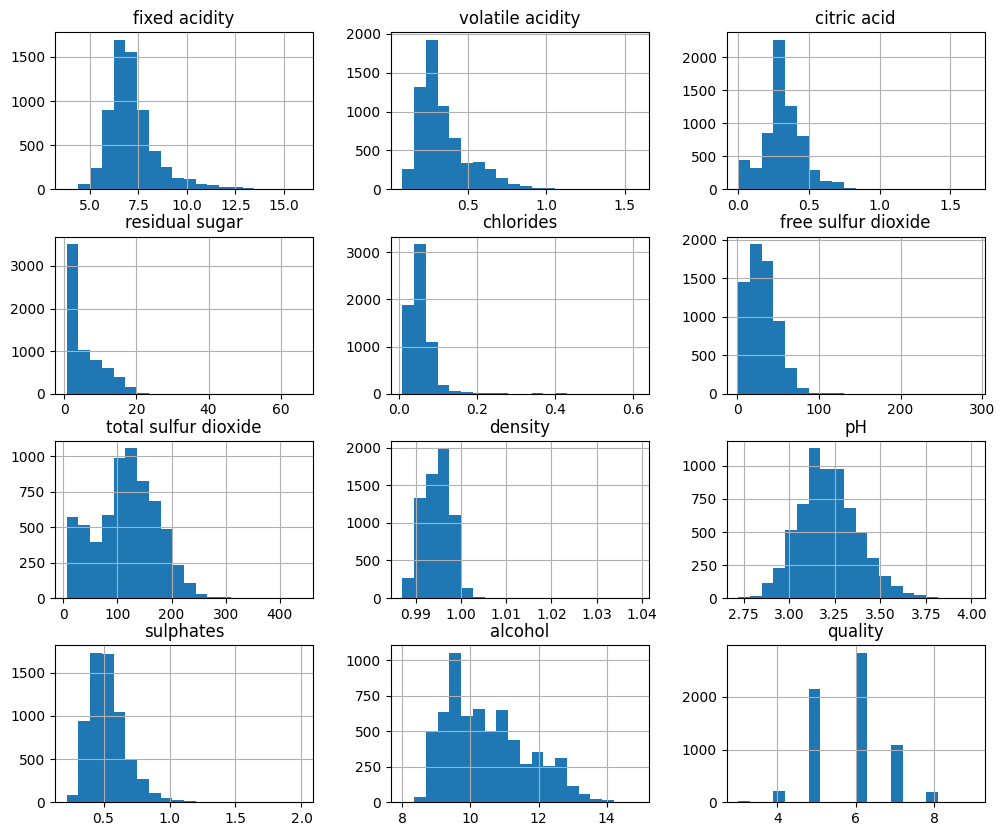

In [4]:
print(df.describe())

df.hist(figsize=(12, 10), bins=20)
plt.show()

# Ραβδόγραμμα για Type

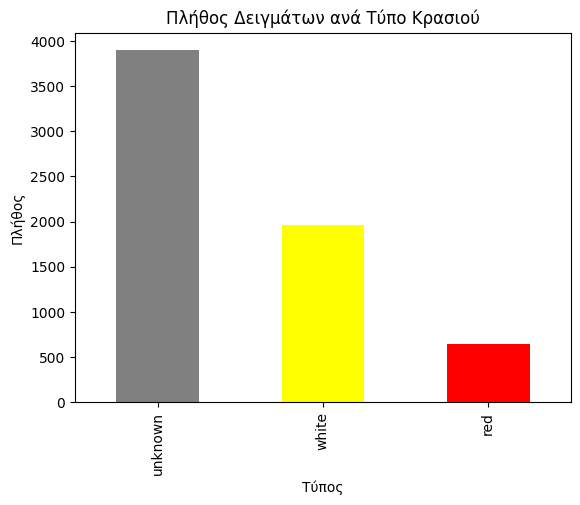

In [5]:
df["type"] = df["type"].fillna("unknown")

df["type"].value_counts().plot(kind="bar", color=["gray", "yellow", "red"])
plt.title("Πλήθος Δειγμάτων ανά Τύπο Κρασιού")
plt.xlabel("Τύπος")
plt.ylabel("Πλήθος")
plt.show()

#2. Μετατροπή τιμών & δημιουργία numpy arrays

In [6]:
mapping = {"unknown": 0, "white": 1, "red": 2}
df["type"] = df["type"].map(mapping)

x = df.drop(columns=["type"]).to_numpy()
y = df["type"].to_numpy()

print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (6497, 12)
y shape: (6497,)


# 3. Δημιουργία 2 συνόλων

In [7]:
df
known_records = df["type"] != 0
x_known = df.loc[known_records].drop(columns=["type"]).to_numpy()
y_known = df.loc[known_records, "type"].to_numpy()

unknown_records = df["type"] == 0
x_unknown = df.loc[unknown_records].drop(columns=["type"]).to_numpy()

print("x_known shape:", x_known.shape)
print("y_known shape:", y_known.shape)
print("x_unknown shape:", x_unknown.shape)

x_known shape: (2599, 12)
y_known shape: (2599,)
x_unknown shape: (3898, 12)


# 4. Train-Test (70-30)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    x_known,
    y_known,
    test_size=0.3,
    random_state=42,
    stratify=y_known
)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (1819, 12)
y_train: (1819,)
x_test: (780, 12)
y_test: (780,)


# 5. Random Forest και μέτρηση ακρίβειας

In [9]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

metrics = {
    "Set": ["Train", "Test"],
    "Accuracy": [
        accuracy_score(y_train, y_pred_train),
        accuracy_score(y_test, y_pred_test)
    ],
    "Precision": [
        precision_score(y_train, y_pred_train, average="weighted"),
        precision_score(y_test, y_pred_test, average="weighted")
    ],
    "Recall": [
        recall_score(y_train, y_pred_train, average="weighted"),
        recall_score(y_test, y_pred_test, average="weighted")
    ],
    "F1": [
        f1_score(y_train, y_pred_train, average="weighted"),
        f1_score(y_test, y_pred_test, average="weighted")
    ]
}

results_df = pd.DataFrame(metrics)
print(results_df)

     Set  Accuracy  Precision    Recall        F1
0  Train  0.999450   0.999451  0.999450  0.999450
1   Test  0.998718   0.998725  0.998718  0.998719


Επειδή στα δείγματα αλλά και γενικότερα φαίνεται τα λευκά κρασιά να είναι πολύ περισσότερα από τα κόκκινα κρασιά και άρα υπάρχει ανισορροπία στα δεδομένα, η πιο κατάλληλη μετρική θα είναι η f1 αφού με την χρήση των μεθόδων precision/recall που ελέγχουν το ποσοστό επιτυχίας στην μία κατηγορία, πετυχαίνουν πιο ασφαλή συμπεράσματα όταν αφορά μη δίκαια κατανεμημένα δεδομένα.

# 6. Random Forest Classifier με Balanced παράμετρο

In [10]:
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_balanced.fit(x_train, y_train)

y_pred_train_bal = rf_balanced.predict(x_train)
y_pred_test_bal = rf_balanced.predict(x_test)

metrics = {
    "Set": ["Train", "Test"],
    "Accuracy": [
        accuracy_score(y_train, y_pred_train_bal),
        accuracy_score(y_test, y_pred_test_bal)
    ],
    "Precision": [
        precision_score(y_train, y_pred_train_bal, average="weighted"),
        precision_score(y_test, y_pred_test_bal, average="weighted")
    ],
    "Recall": [
        recall_score(y_train, y_pred_train_bal, average="weighted"),
        recall_score(y_test, y_pred_test_bal, average="weighted")
    ],
    "F1": [
        f1_score(y_train, y_pred_train_bal, average="weighted"),
        f1_score(y_test, y_pred_test_bal, average="weighted")
    ]
}

results_df = pd.DataFrame(metrics)
print(results_df)

     Set  Accuracy  Precision    Recall        F1
0  Train  0.999450   0.999451  0.999450  0.999450
1   Test  0.994872   0.994871  0.994872  0.994863


Σύμφωνα με το documentation του scikit-learn, η παράμετρος χρησιμοποιείται για να αντιμετωπίσει προβλήματα ανισορροπίας στο dataset. Όταν οι κλάσεις (π.χ. white και red) δεν έχουν το ίδιο πλήθος δειγμάτων, το μοντέλο μπορεί να μάθει να “προτιμά” την πολυπληθέστερη κλάση. Δηλαδή, αν τα “red” δείγματα είναι λιγότερα, το μοντέλο δίνει σε αυτά μεγαλύτερο βάρος.

# 7. Πιθανότητες για την κλάση κάθε παραδείγματος

In [11]:
y_unknown_proba = rf_balanced.predict_proba(x_unknown)

df_proba = pd.DataFrame(y_unknown_proba, columns=['Prob_White', 'Prob_Red'])
print(df_proba.head())

   Prob_White  Prob_Red
0         1.0       0.0
1         1.0       0.0
2         1.0       0.0
3         1.0       0.0
4         1.0       0.0


# 8.

In [12]:
y_unknown_proba = rf_balanced.predict_proba(x_unknown)

proba_df = pd.DataFrame(y_unknown_proba, columns=['Prob_White', 'Prob_Red'])

proba_df['Predicted_Label'] = np.nan
proba_df.loc[proba_df['Prob_Red'] > 0.65, 'Predicted_Label'] = 2
proba_df.loc[proba_df['Prob_Red'] < 0.35, 'Predicted_Label'] = 1

print(proba_df.head(10))

   Prob_White  Prob_Red  Predicted_Label
0        1.00      0.00              1.0
1        1.00      0.00              1.0
2        1.00      0.00              1.0
3        1.00      0.00              1.0
4        1.00      0.00              1.0
5        1.00      0.00              1.0
6        0.95      0.05              1.0
7        1.00      0.00              1.0
8        1.00      0.00              1.0
9        1.00      0.00              1.0


# 9. Ένωση συνόλων με τα δεδομένα που επισημειώθηκαν με ετικέτες στο προηγούμενο ερώτημα

In [13]:
x_new = x_unknown[proba_df.index]
y_new = proba_df['Predicted_Label'].notna()

x_train_extended = np.concatenate([x_train, x_new], axis=0)
y_train_extended = np.concatenate([y_train, y_new], axis=0)

model_extended = RandomForestClassifier(random_state=42, class_weight='balanced')
model_extended.fit(x_train_extended, y_train_extended)

y_pred_train_extended = model_extended.predict(x_train_extended)
y_pred_test_extended = model_extended.predict(x_test)

metrics = {
    "Set": ["Train", "Test"],
    "Accuracy": [
        accuracy_score(y_train_extended, y_pred_train_extended),
        accuracy_score(y_test, y_pred_test_extended)
    ],
    "Precision": [
        precision_score(y_train_extended, y_pred_train_extended, average="weighted"),
        precision_score(y_test, y_pred_test_extended, average="weighted")
    ],
    "Recall": [
        recall_score(y_train_extended, y_pred_train_extended, average="weighted"),
        recall_score(y_test, y_pred_test_extended, average="weighted")
    ],
    "F1": [
        f1_score(y_train_extended, y_pred_train_extended, average="weighted"),
        f1_score(y_test, y_pred_test_extended, average="weighted")
    ]
}

results_df = pd.DataFrame(metrics)
print(results_df)

     Set  Accuracy  Precision    Recall        F1
0  Train  0.984083   0.986689  0.984083  0.984733
1   Test  0.785897   0.834034  0.785897  0.717316


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 10. Επανάληψη μέχρι να εξαντληθούν τα δείγματα με υψηλό confidence

In [14]:
threshold_high = 0.65
threshold_low = 0.35
iteration = 0

x_train_iter = x_train.copy()
y_train_iter = y_train.copy()
x_unknown_iter = x_unknown.copy()

while True:
    iteration += 1
    print(f"\n--- Επανάληψη {iteration} ---")

    model = RandomForestClassifier(random_state=42, class_weight='balanced')
    model.fit(x_train_iter, y_train_iter)

    y_unknown_proba = model.predict_proba(x_unknown_iter)

    red_mask = y_unknown_proba[:, 1] > threshold_high
    white_mask = y_unknown_proba[:, 1] < threshold_low

    if not (np.any(red_mask) or np.any(white_mask)):
        print("✅ Δεν υπάρχουν άλλα δείγματα με υψηλό confidence. Τέλος.")
        break

    x_new = np.concatenate([x_unknown_iter[red_mask], x_unknown_iter[white_mask]])
    y_new = np.concatenate([
        np.full(sum(red_mask), 2),  # red = 2
        np.full(sum(white_mask), 1) # white = 1
    ])

    x_train_iter = np.concatenate([x_train_iter, x_new])
    y_train_iter = np.concatenate([y_train_iter, y_new])

    keep_mask = ~(red_mask | white_mask)
    x_unknown_iter = x_unknown_iter[keep_mask]

    print(f"Προστέθηκαν {len(x_new)} νέα δείγματα, απομένουν {len(x_unknown_iter)} unknown.")

model.fit(x_train_iter, y_train_iter)

train_acc = accuracy_score(y_train, model.predict(x_train))
test_acc = accuracy_score(y_test, model.predict(x_test))

print("\nΤελικές ακρίβειες:")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

y_pred_known = model.predict(x_train_iter)
y_pred_unknown = model.predict(x_unknown_iter)

results = pd.DataFrame({
    "Sample_ID": range(len(y_pred_unknown)),
    "Predicted_Label": y_pred_unknown
})

label_map = {1: "white", 2: "red"}
results["Predicted_Label"] = results["Predicted_Label"].map(label_map)

print("\n--- Τελικές Προβλέψεις για Unknown Δείγματα ---")
print(results.head(10))



--- Επανάληψη 1 ---
Προστέθηκαν 3847 νέα δείγματα, απομένουν 51 unknown.

--- Επανάληψη 2 ---
Προστέθηκαν 20 νέα δείγματα, απομένουν 31 unknown.

--- Επανάληψη 3 ---
Προστέθηκαν 7 νέα δείγματα, απομένουν 24 unknown.

--- Επανάληψη 4 ---
Προστέθηκαν 3 νέα δείγματα, απομένουν 21 unknown.

--- Επανάληψη 5 ---
✅ Δεν υπάρχουν άλλα δείγματα με υψηλό confidence. Τέλος.

Τελικές ακρίβειες:
Train Accuracy: 0.999450247388675
Test Accuracy: 0.9974358974358974

--- Τελικές Προβλέψεις για Unknown Δείγματα ---
   Sample_ID Predicted_Label
0          0           white
1          1           white
2          2           white
3          3             red
4          4             red
5          5           white
6          6             red
7          7             red
8          8             red
9          9             red


# ΜΕΡΟΣ 2

# 1. Φόρτωση δεδομένων, Ισορροπημένο score ή όχι και διάγραμμα

Text(0, 0.5, 'Πλήθος Δειγμάτων')

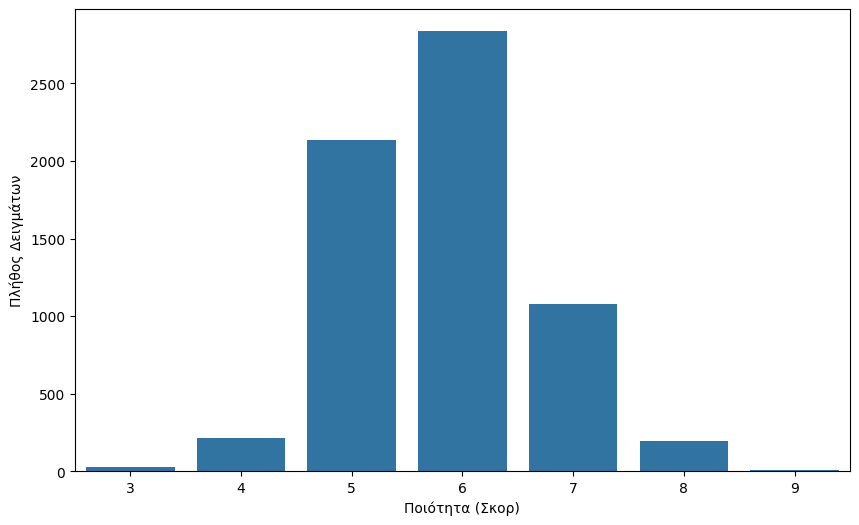

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df_full = pd.read_csv("wine-full.csv")

plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df_full, order=sorted(df_full['quality'].unique()))
plt.xlabel('Ποιότητα (Σκορ)')
plt.ylabel('Πλήθος Δειγμάτων')

Όπως φαίνεται καθαρά από την κατανομή, το σύνολο δεδομένων παρουσιάζει έντονη ανισορροπία. Η συντριπτική πλειοψηφία των δειγμάτων είναι συγκεντρωμένη στις "μέσες" τιμές ποιότητας. Αντίθετα, οι ακραίες τιμές ποιότητας (πολύ κακή ή πολύ καλή) είναι εξαιρετικά σπάνιες.
Αυτή η κατανομή δεν είναι ομοιόμορφη αλλά θυμίζει κανονική κατανομή. Θα κάνει πολύ δύσκολο για ένα μοντέλο να μάθει πώς να αναγνωρίζει τα κρασιά με ποιότητα 3 ή 9, επειδή απλά δεν έχει αρκετά παραδείγματα για να εκπαιδευτεί.

# 2. Το κόκκινο η το λευκό κρασί είναι ποιοτικά καλύτερο;

type
red      5.636023
white    5.877909
Name: quality, dtype: float64


<Axes: xlabel='type', ylabel='quality'>

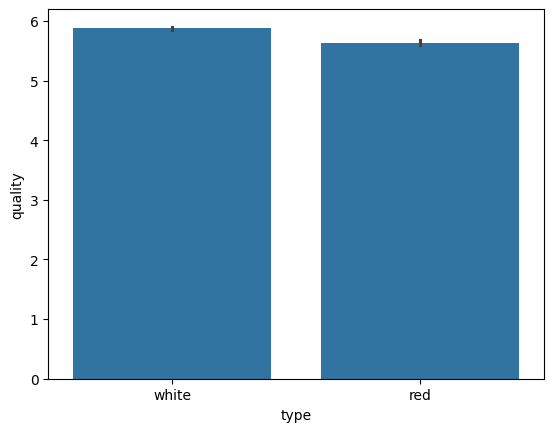

In [16]:
from scipy.stats import ttest_ind

print(df_full.groupby('type')['quality'].mean())

sns.barplot(x='type', y='quality', data=df_full)

Βάσει των δεδομένων μας, το λευκό κρασί είναι ποιοτικά ανώτερο από το κόκκινο, με μια στατιστική διαφορά περίπου στο 4%.

# 3. Ξηρό ή γλυκό πιο ποιοτικό;

3.0

 Μέση Ποιότητα ανά Κατηγορία:
sweetness
Γλυκό    5.829306
Ξηρό     5.807586
Name: quality, dtype: float64


Text(0.5, 0, 'Κατηγορία Γλυκύτητας')

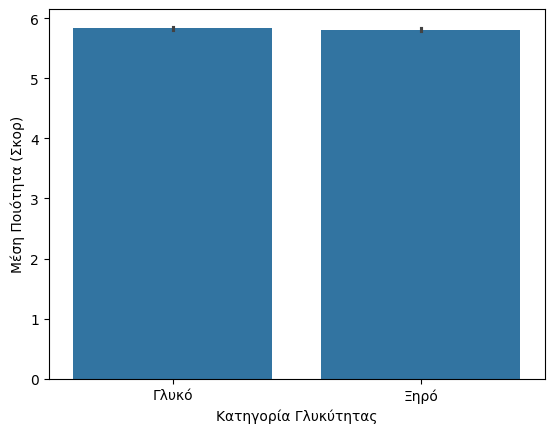

In [17]:
median_sugar = df_full['residual sugar'].median()
print(median_sugar)

df_full['sweetness'] = ['Γλυκό' if sugar > median_sugar else 'Ξηρό' for sugar in df_full['residual sugar']]
print("\n Μέση Ποιότητα ανά Κατηγορία:")
mean_quality_by_sweetness = df_full.groupby('sweetness')['quality'].mean()
print(mean_quality_by_sweetness)

plt.figure()
sns.barplot(x='sweetness', y='quality', data=df_full)
plt.ylabel('Μέση Ποιότητα (Σκορ)')
plt.xlabel('Κατηγορία Γλυκύτητας')

Η διάμεση τιμή για τη στήλη residual sugar είναι 3. Αυτό σημαίνει ότι τα μισά κρασιά στο δείγμα μας έχουν λιγότερο από 3.0 σάκχαρα και τα άλλα μισά έχουν περισσότερα.
Άρα αν θεωρήσουμε ως "Ξηρό" οτιδήποτε είναι ≤ 3.0 g/L και "Γλυκό" οτιδήποτε είναι > 3.0 g/L, μπορούμε να υπολογίσουμε τη μέση ποιότητα για τις δύο αυτές νέες ομάδες.

Μέση Ποιότητα "Ξηρών": 5.808
Μέση Ποιότητα "Γλυκών": 5.829

Άρα όχι, το γλυκό κρασί δεν έχει σημαντικά μεγαλύτερη ποιότητα από το ξηρό.

# 4. Numpy Arrays και Train-Test Split 90-10

In [18]:
df['type'] = df['type'].map({'white': 0, 'red': 1})

y = df['quality'].values
x = df.drop('quality', axis=1).values

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.10,
    random_state=0
)

# 5. Εκπαίδευση DecisionTreeRegressor υπολογισμός σφάλματος με τη μετρική MAE

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE) στο Test Set: {mae:.4f}")

Mean Absolute Error (MAE) στο Test Set: 0.4354


# 6. Επανάληψη με διαφορετικά seed

In [20]:
mae_scores = []

for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(
        x, y,
        test_size=0.10,
        random_state=seed
    )

    model = DecisionTreeRegressor(random_state=0)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

print(f"Οι 10 βαθμολογίες MAE ήταν: {[round(m, 4) for m in mae_scores]}")
print(f"Μέσος Όρος (Mean) MAE: {mean_mae:.4f}")
print(f"Τυπική Απόκλιση (Std Dev) MAE: {std_mae:.4f}")

Οι 10 βαθμολογίες MAE ήταν: [0.4354, 0.4985, 0.4169, 0.4815, 0.4846, 0.4385, 0.4831, 0.4738, 0.4338, 0.48]
Μέσος Όρος (Mean) MAE: 0.4626
Τυπική Απόκλιση (Std Dev) MAE: 0.0269


Ανεξάρτητα από το πώς χωρίσαμε τα δεδομένα (ποια 650 δείγματα έτυχε να πάνε στο test set), το σφάλμα MAE παρέμεινε πολύ σταθερό (0.43 έως 0.50). Το αναμενόμενο σφάλμα του μοντέλου είναι 0.46 +- 0.02.Αυτό σημαίνει ότι είμαστε αρκετά σίγουροι ότι το πραγματικό σφάλμα σε νέα δεδομένα θα κυμανθεί μεταξύ 0.44-0.48 και άρα το μοντέλο μας είναι αξιόπιστο.

# 7.

In [34]:
# 70% Train, 30% Val + Test
x_train, x_temp, y_train, y_temp = train_test_split(
    x, y,
    test_size=0.30,
    random_state=0
)

# Split 30% σε 20% Val, 10% Test
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp,
    test_size=0.3333,
    random_state=0
)

max_depth_options = [5, 8, 10, 12, None]  # 5 επιλογές
min_samples_leaf_options = [1, 10, 50]  # 3 επιλογές
# Σύνολο 5 * 3 = 15 συνδυασμοί

print("max_depth | min_samples_leaf | MAE Train | MAE Val")

for depth in max_depth_options:
    for leaf in min_samples_leaf_options:

        model = DecisionTreeRegressor(
            random_state=0,
            max_depth=depth,
            min_samples_leaf=leaf
        )

        model.fit(x_train, y_train)

        mae_train = mean_absolute_error(y_train, model.predict(x_train))
        mae_val = mean_absolute_error(y_val, model.predict(x_val))

        print(f"{str(depth):>5} | {str(leaf):>15} | {mae_train:<9.4f} | {mae_val:<7.4f}")

max_depth | min_samples_leaf | MAE Train | MAE Val
    5 |               1 | 0.5362    | 0.5738 
    5 |              10 | 0.5397    | 0.5702 
    5 |              50 | 0.5390    | 0.5694 
    8 |               1 | 0.4468    | 0.5591 
    8 |              10 | 0.4756    | 0.5618 
    8 |              50 | 0.5197    | 0.5689 
   10 |               1 | 0.3508    | 0.5474 
   10 |              10 | 0.4367    | 0.5637 
   10 |              50 | 0.5180    | 0.5697 
   12 |               1 | 0.2418    | 0.5293 
   12 |              10 | 0.4161    | 0.5607 
   12 |              50 | 0.5180    | 0.5697 
 None |               1 | 0.0000    | 0.4731 
 None |              10 | 0.4088    | 0.5634 
 None |              50 | 0.5180    | 0.5697 


# 8. Ποιό από τα δύο σύνολα δεδομένα (training ή validation set) είναι περισσότερο αξιόπιστο για την επιλογή υπερπαραμέτρων?

Το Train Set αποτελείται από τα γνωστά δεδομένα για το μοντέλο. Το μοντέλο μπορεί να πετυχαίνει πολύ μικρό σφάλμα στο train set αλλά αυτό μπορεί να οφείλεται σε overfitting. Το Validation Set αποτελεί πιο αξιόπιστη επιλογή καθώς το μοντέλο δοκιμάζεται πραγματικά με άγνωστα δεδομένα.

# 9.

In [37]:
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.10,
    random_state=0
)

estimator = DecisionTreeRegressor(random_state=0)

param_grid = {
    'max_depth': [5, 8, 10, 12, None],
    'min_samples_leaf': [1, 10, 50]
}

# Επειδή εμείς θέλουμε να *ελαχιστοποιήσουμε* το MAE,
# πρέπει να χρησιμοποιήσουμε το 'neg_mean_absolute_error'.
scoring_metric = 'neg_mean_absolute_error'

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring=scoring_metric,
    cv=10,        # 10-fold cross-validation
    n_jobs=-1    # Χρήση όλων των πυρήνων
)

grid_search.fit(x_train, y_train)

# Το grid_search.best_score_ είναι αρνητικό (π.χ. -0.46),
# οπότε το πολλαπλασιάζουμε με -1 για να βρούμε το MAE.
best_mae = -grid_search.best_score_

print(f"Ο καλύτερος συνδυασμός παραμέτρων είναι:")
print(grid_search.best_params_)
print(f"Το καλύτερο (μέσο) MAE από Cross-Validation (cv=10) είναι: {best_mae:.4f}")

Ο καλύτερος συνδυασμός παραμέτρων είναι:
{'max_depth': None, 'min_samples_leaf': 1}
Το καλύτερο (μέσο) MAE από Cross-Validation (cv=10) είναι: 0.4813


# 10. Ποια από τις μεθοδολογίες που ακολουθήθηκαν (6/7/9) είναι περισσότερο αξιόπιστη?


In [38]:
best_model = DecisionTreeRegressor(
    random_state=0,
    max_depth=None,
    min_samples_leaf=1
)

# 1. Εκπαίδευση του x_train (90%)
best_model.fit(x_train, y_train)

# 2. Αξιολόγηση στο "άγνωστο" x_test (10%)
y_pred = best_model.predict(x_test)
final_mae = mean_absolute_error(y_test, y_pred)

print(f"Το Τελικό MAE στο Test Set είναι: {final_mae:.4f}")

Το Τελικό MAE στο Test Set είναι: 0.4354


1. Single Train/Test Split
Χωρίσαμε μία φορά τα δεδομένα (90-10) και μετρήσαμε το MAE.
Η μέτρηση βασίζεται αποκλειστικά σε έναν συγκεκριμένο, τυχαίο διαχωρισμό. Αν είχαμε επιλέξει άλλο random_state, το MAE θα ήταν εντελώς διαφορετικό.

2. Cross-Validation - 10 Different Splits
Επαναλάβαμε τη διαδικασία 10 φορές με διαφορετικά seed. Πήραμε 10 διαφορετικά MAE και βρήκαμε τον Μέσο Όρο (0.4626) και την Τυπική Απόκλιση (0.0269).
Μας δίνει μια αξιόπιστη εκτίμηση του πόσο καλό είναι το μοντέλο μας (το αναμενόμενο σφάλμα) και πόσο σταθερό είναι (η τυπική απόκλιση).

3. GridSearchCV
Κάνει Tuning στο Train Set (90%): Χρησιμοποιεί 10-Fold Cross-Validation μόνο μέσα στο train set, για να βρει τις καλύτερες υπερπαραμέτρους (max_depth=None, min_samples_leaf=1).
Μόνο αφού έχει βρει το καλύτερο μοντέλο, το εκπαιδεύει σε όλο το 90% και το δοκιμάζει μία και μοναδική φορά στο 10% του test set.

Συμπέρασμα:
Η Μεθοδολογία GridSearchCV είναι η περισσότερο αξιόπιστη με διαφορά.
Το k=10 έχει αποδειχθεί πειραματικά ότι είναι το καλύτερο για μια ακριβέστερη εκτίμηση. Ο λόγος είναι ότι είναι η μόνη μεθοδολογία που σέβεται τον "χρυσό κανόνα": Δεν επιτρέπεται ποτέ το τελικό test set να επηρεάσει την επιλογή του μοντέλου. Για κάθε ένα παράδειγμα, το μοντέλο εκπαιδεύεται χρησιμοποιώντας τα υπόλοιπα n-1 (training set) και επικυρώνεται με αυτό που αφήσαμε έξω.

Στις μεθόδους 1 και 2, αναμειγνύαμε την αξιολόγηση με την επιλογή. Στη μέθοδο 3, το tuning (Ερώτημα 9) και η τελική αξιολόγηση (Ερώτημα 10) ήταν δύο εντελώς ξεχωριστά βήματα. Αυτό μας δίνει τη μεγαλύτερη βεβαιότητα ότι το τελικό μας σφάλμα (0.4534) είναι αμερόληπτο.

# 11. Επαναλάβετε την ερώτηση 9, χρησιμοποιώντας πάντα σταθερό max_depth=5. Εμφανίστε το καλύτερο δέντρο (με τη χρήση της plot tree). Επιπλέον, να αναφέρετε τους κανόνες που δημιουργήθηκαν (πχ το κρασί έχει υψηλό σκορ αν περιέχει πολύ ζάχαρη, είναι κόκκινο, κλπ..). Τέλος, να εμφανίσετε ραβδόγραμμα με τη σημαντικότητα κάθε χαρακτηριστικού, ταξινομώντας τα με βάση τη σημαντικότητα τους.

Ο καλύτερος συνδυασμός (με max_depth=5) είναι:
{'max_depth': 5, 'min_samples_leaf': 50}
Το καλύτερο (μέσο) MAE από CV(10) είναι: 0.5654
Οι κανόνες που έμαθε το δέντρο (max_depth=5) είναι:

|--- alcohol <= 10.62
|   |--- volatile acidity <= 0.24
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- density <= 1.00
|   |   |   |   |--- alcohol <= 10.12
|   |   |   |   |   |--- value: [5.79]
|   |   |   |   |--- alcohol >  10.12
|   |   |   |   |   |--- value: [6.09]
|   |   |   |--- density >  1.00
|   |   |   |   |--- citric acid <= 0.31
|   |   |   |   |   |--- value: [7.07]
|   |   |   |   |--- citric acid >  0.31
|   |   |   |   |   |--- value: [6.07]
|   |   |--- volatile acidity >  0.21
|   |   |   |--- free sulfur dioxide <= 23.50
|   |   |   |   |--- value: [5.44]
|   |   |   |--- free sulfur dioxide >  23.50
|   |   |   |   |--- residual sugar <= 15.25
|   |   |   |   |   |--- value: [5.85]
|   |   |   |   |--- residual sugar >  15.25
|   |   |   |   |   |--- value: [5.53]
|   

<Axes: xlabel='Importance', ylabel='Feature'>

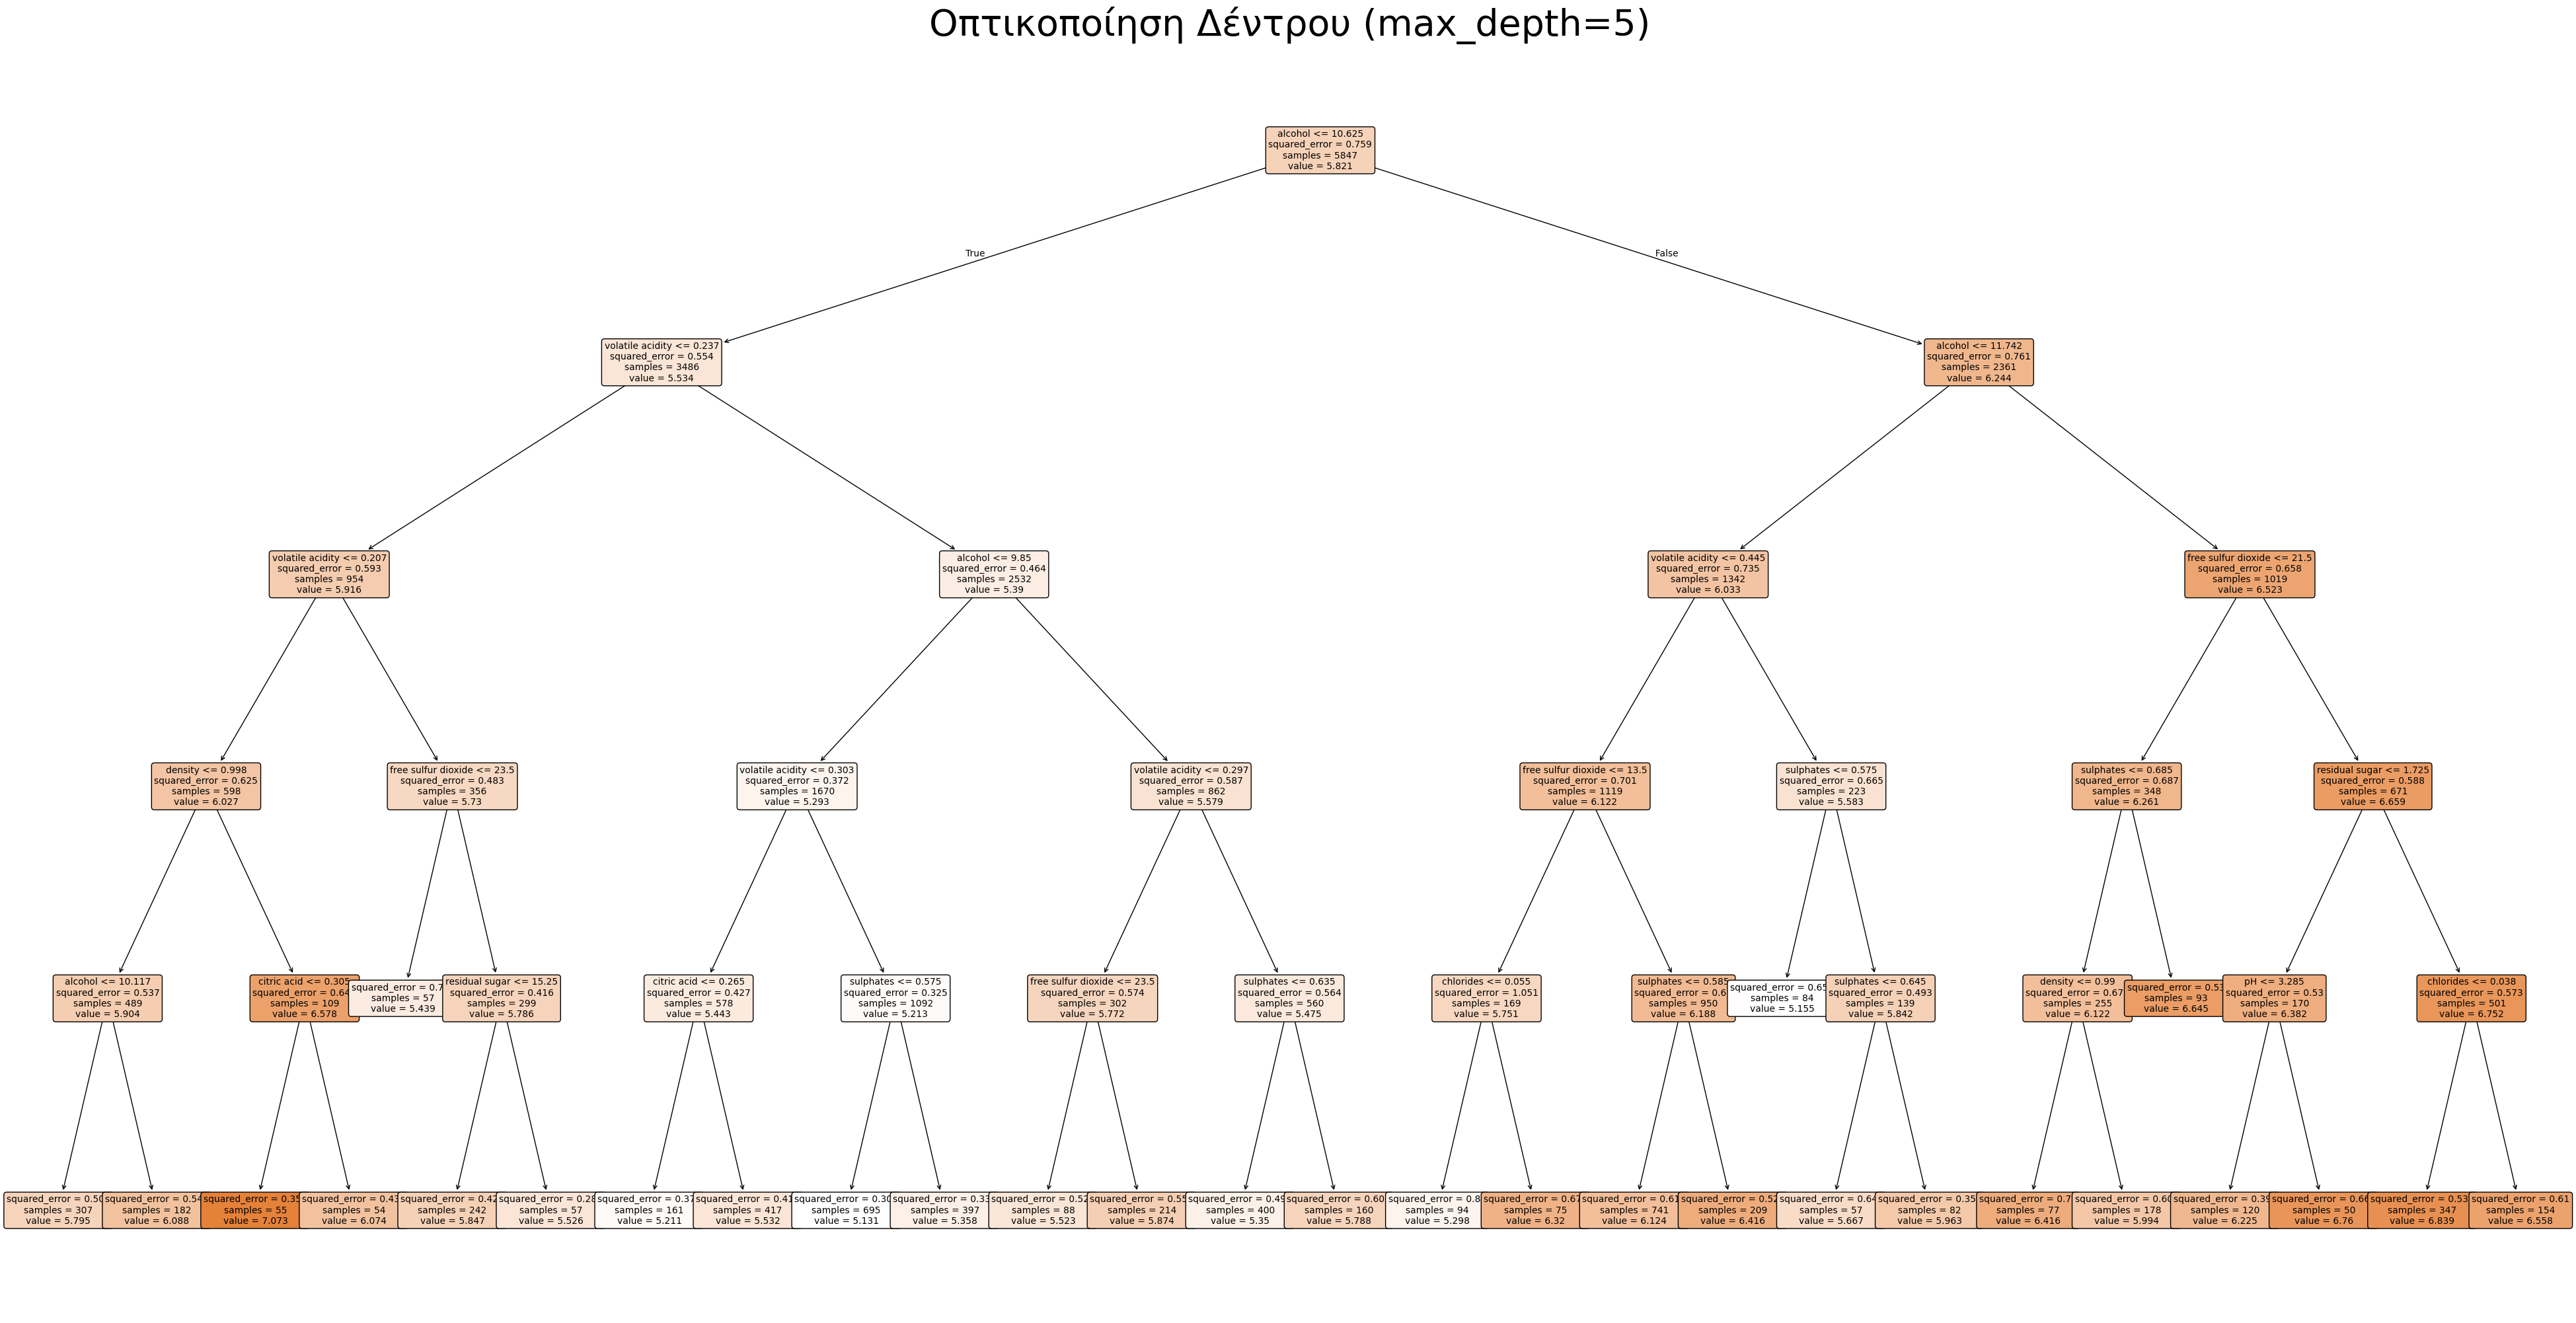

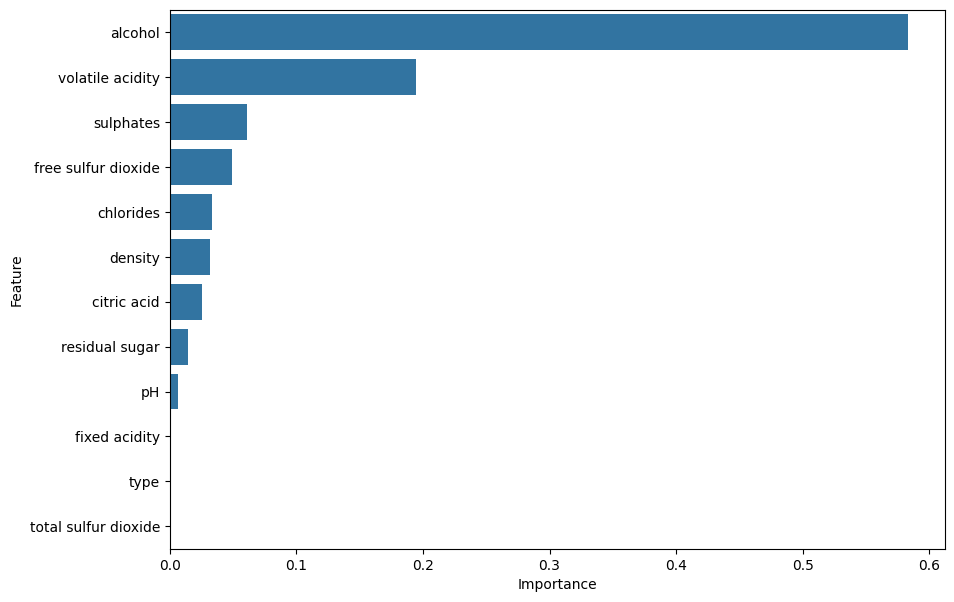

In [42]:
from sklearn.tree import plot_tree, export_text

feature_names = df.drop('quality', axis=1).columns.tolist()

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.10,
    random_state=0
)

estimator = DecisionTreeRegressor(random_state=0)

# Νέο grid: Το max_depth είναι "κλειδωμένο", ψάχνουμε μόνο το min_samples_leaf
param_grid = {
    'max_depth': [5], # Σταθερό
    'min_samples_leaf': [1, 5, 10, 20, 50, 100] # 6 επιλογές
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=10,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_mae = -grid_search.best_score_

print(f"Ο καλύτερος συνδυασμός (με max_depth=5) είναι:")
print(best_params)
print(f"Το καλύτερο (μέσο) MAE από CV(10) είναι: {best_mae:.4f}")

# Δημιουργία του τελικού, βέλτιστου μοντέλου (με depth=5)
final_model = DecisionTreeRegressor(
    random_state=0,
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf']
)

final_model.fit(x_train, y_train)

# Εξαγωγή των κανόνων σε κείμενο
rules = export_text(final_model, feature_names=feature_names)
print("Οι κανόνες που έμαθε το δέντρο (max_depth=5) είναι:\n")
print(rules)

plt.figure(figsize=(50, 25))
plot_tree(
    final_model,
    filled=True,
    feature_names=feature_names,
    max_depth=5,
    fontsize=10,
    rounded=True
)

plt.title("Οπτικοποίηση Δέντρου (max_depth=5)", fontsize=40)

# Ραβδόγραμμα Σημαντικότητας
importances = final_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df
)